<a href="https://colab.research.google.com/github/JuniorGunner/DataScienceFormation/blob/master/Pandas/Pandas_Class08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Class 08 - Estatísticas Descritivas
## Criando Agrupamentos

In [1]:
import pandas as pd

dados = pd.read_csv('aluguel_residencial.csv', sep = ';')
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,29.33,Casa
6,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,15.38,Casa
7,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
8,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento


In [4]:
round(dados['Valor'].mean(), 2)

5046.17

In [6]:
bairros = ['Barra da Tijuca', 'Copacabana', 'Ipanema', 'Leblon', 'Botafogo', 'Flamengo', 'Tijuca']
selecao = dados['Bairro'].isin(bairros)
dados = dados[selecao]
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,29.33,Casa
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento
10,Quitinete,Copacabana,1,0,0,27,1800.0,501.0,0.0,66.67,Apartamento
11,Apartamento,Copacabana,4,3,1,243,13000.0,2000.0,803.0,53.50,Apartamento
14,Apartamento,Barra da Tijuca,2,1,1,67,1700.0,589.0,147.0,25.37,Apartamento
15,Apartamento,Tijuca,2,1,0,110,1900.0,700.0,138.0,17.27,Apartamento
16,Casa de Condomínio,Barra da Tijuca,4,3,2,466,7500.0,2695.0,0.0,16.09,Casa
18,Apartamento,Tijuca,2,1,0,78,2000.0,700.0,0.0,25.64,Apartamento
19,Apartamento,Ipanema,3,1,1,125,7000.0,2100.0,463.0,56.00,Apartamento


In [7]:
dados['Bairro'].drop_duplicates()

0          Copacabana
5     Barra da Tijuca
15             Tijuca
19            Ipanema
23           Botafogo
27             Leblon
78           Flamengo
Name: Bairro, dtype: object

In [8]:
grupo_bairro = dados.groupby('Bairro')
grupo_bairro

In [10]:
for bairro, data in grupo_bairro:
  print(bairro)

Barra da Tijuca
Botafogo
Copacabana
Flamengo
Ipanema
Leblon
Tijuca


In [12]:
for bairro, data in grupo_bairro:
  print('{} -> {}'.format(bairro, round(data.Valor.mean(), 2)))

Barra da Tijuca -> 7069.55
Botafogo -> 8791.83
Copacabana -> 4126.68
Flamengo -> 4113.53
Ipanema -> 9352.0
Leblon -> 8746.34
Tijuca -> 2043.52


In [13]:
grupo_bairro[['Valor', 'Condominio']].mean().round(2)

,Valor,Condominio
Bairro,,
Barra da Tijuca,7069.55,3591.01
Botafogo,8791.83,976.28
Copacabana,4126.68,1148.68
Flamengo,4113.53,1102.15
Ipanema,9352.00,2244.44
Leblon,8746.34,2107.18
Tijuca,2043.52,711.69


In [15]:
grupo_bairro['Valor'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Barra da Tijuca,3863.0,7069.55,11874.15,800.0,2500.0,4500.0,8500.0,600000.0
Botafogo,873.0,8791.83,152202.41,700.0,2200.0,3000.0,4350.0,4500000.0
Copacabana,2644.0,4126.68,3611.41,100.0,2000.0,3000.0,4800.0,35000.0
Flamengo,714.0,4113.53,3839.13,800.0,1900.0,2900.0,4975.0,35000.0
Ipanema,1764.0,9352.00,8219.72,1200.0,4500.0,7000.0,11000.0,90000.0
Leblon,1258.0,8746.34,7004.04,100.0,4500.0,7000.0,10500.0,100000.0
Tijuca,1100.0,2043.52,1664.34,750.0,1500.0,1800.0,2300.0,45000.0


In [17]:
grupo_bairro['Valor'].aggregate(['min', 'max', 'sum']).rename(columns = {'min': 'Mínimo', 'max': 'Máximo', 'sum': 'Soma'})

,Mínimo,Máximo,Soma
Bairro,,,
Barra da Tijuca,800.0,600000.0,27309683.0
Botafogo,700.0,4500000.0,7675266.0
Copacabana,100.0,35000.0,10910934.0
Flamengo,800.0,35000.0,2937058.0
Ipanema,1200.0,90000.0,16496930.0
Leblon,100.0,100000.0,11002902.0
Tijuca,750.0,45000.0,2247872.0


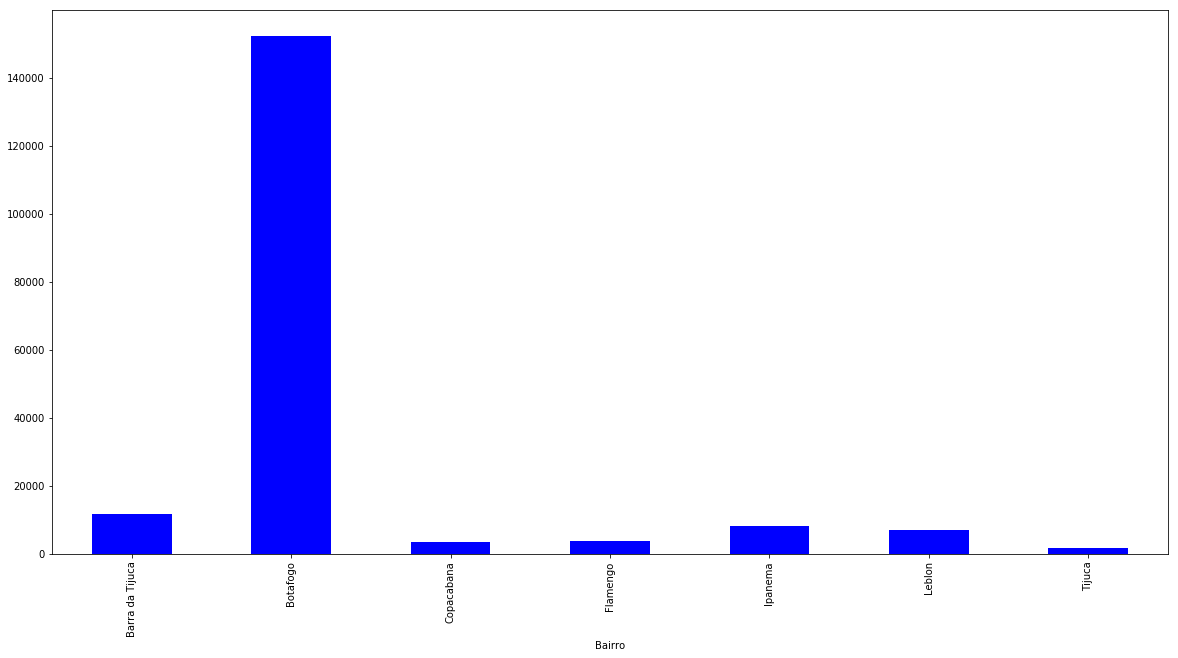

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (20, 10))

fig = grupo_bairro['Valor'].std().plot.bar(color = 'blue')

(Text(0.5, 1.0, 'Valor Médio do Aluguel por Bairro'), {'fontsize': 22})

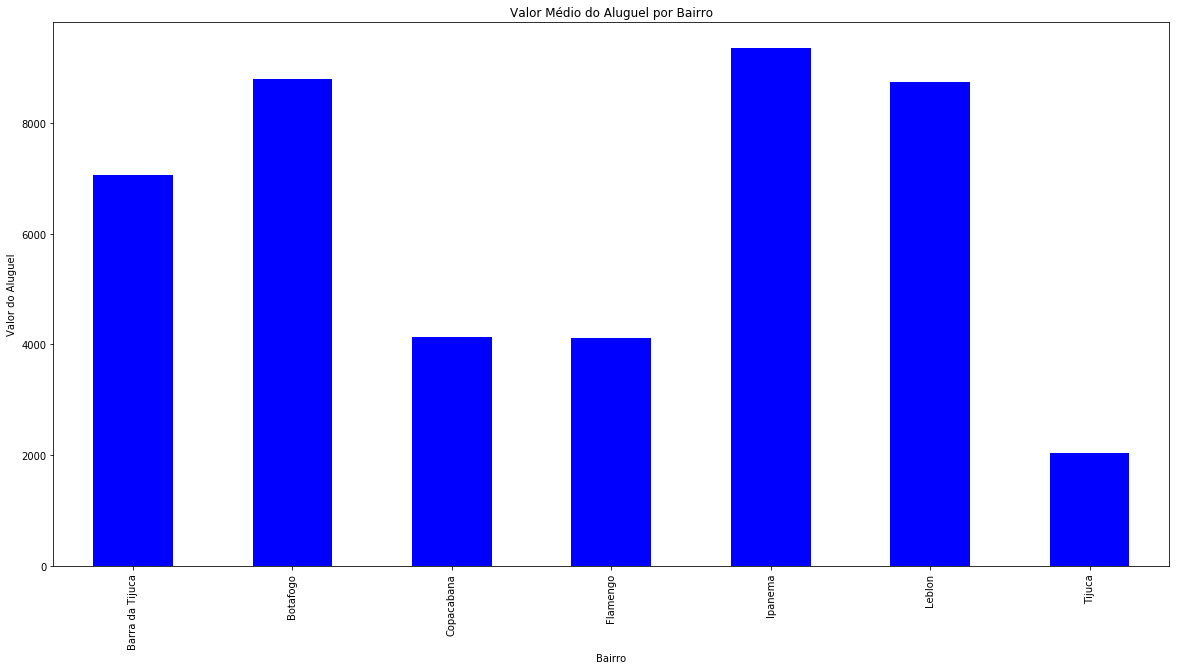

In [22]:
fig = grupo_bairro['Valor'].mean().plot.bar(color = 'blue')
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Valor Médio do Aluguel por Bairro'), {'fontsize': 22}

## Extras - Criando Faixas de Valor

In [24]:
dados = pd.read_csv('aluguel.csv', sep = ';')
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
7,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,NaN,NaN
8,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0


* Gerar frequência de quartos:

In [28]:
""" Matriz categorizada """
classes = [0, 2, 4, 6, 100]
quartos = pd.cut(dados.Quartos, classes)
quartos.head(10)

0    (0.0, 2.0]
1    (0.0, 2.0]
2           NaN
3    (0.0, 2.0]
4    (0.0, 2.0]
5    (2.0, 4.0]
6    (0.0, 2.0]
7    (4.0, 6.0]
8    (0.0, 2.0]
9           NaN
Name: Quartos, dtype: category
Categories (4, interval[int64]): [(0, 2] < (2, 4] < (4, 6] < (6, 100]]

In [30]:
quartos.value_counts()

(0, 2]      12419
(2, 4]       9894
(4, 6]        709
(6, 100]       87
Name: Quartos, dtype: int64

In [34]:
labels = ['1 e 2 quartos', '3 e 4 quartos', '5 e 6 quartos', '7 quartos ou mais']
quartos = pd.cut(dados.Quartos, classes, labels = labels, include_lowest = True) # include_lowest inclui imóveis com 0 quarto | Necessárias modificações
pd.value_counts(quartos)

1 e 2 quartos        22270
3 e 4 quartos         9894
5 e 6 quartos          709
7 quartos ou mais       87
Name: Quartos, dtype: int64